In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
run_dir = './eval'

In [3]:
run_dic_list = []
runs = os.listdir(run_dir)
for run in runs:
    dic = {}
    run_split = run.split("__")
    dic["data"] = run_split[0]
    dic["datetime"] =  run_split[1][-15:]
    run_name = run_split[1][:-16]
    dic["name"] = run_name
    run_dic_list.append(dic)

In [4]:
def print_clf_acc(data, name, datetime='', valid=False):
    target_run = [run for run in run_dic_list if run["data"]==data and run["name"]==name]
    print(target_run)
    if datetime=='':
        time_sorted_target_run = sorted(target_run, key=lambda target_run: target_run["datetime"], reverse=True)
        for i in range(len(time_sorted_target_run)):
            datetime = time_sorted_target_run[i]["datetime"]
            if valid==True:
                acc_list = []
                for i in range(100, 10001, 100):
                    clf_path = os.path.join(run_dir, data + "__" + name + '_' + datetime, f'classification_i{i}.pkl')
                    if os.path.exists(clf_path):
                        result = pd.read_csv(clf_path)
                        acc_list.append(result['Accuracy'].mean().round(4))
                return acc_list
            else:
                clf_path = os.path.join(run_dir, data + "__" + name + '_' + datetime, 'classification.pkl')
                if os.path.exists(clf_path):
                    result = pd.read_csv(clf_path)
                    acc = result['Accuracy'].mean().round(4)
                    print("{}__{}: {}".format(data, name, acc))
                    break
    else:
        raise NotImplementedError

In [5]:
run_name_list = ['', 'cosine', 'km', 'km_argmax', 'km_argmax_edis', 'km_edis', 'km_K6', 'km_K6_edis', 'km_K6_edis_argmax',]

for name in run_name_list:
    print_clf_acc('6_data', name)

6_data__: 0.7906
6_data__cosine: 0.7874
6_data__km: 0.7664
6_data__km_argmax: 0.7589
6_data__km_argmax_edis: 0.7589
6_data__km_edis: 0.7677
6_data__km_K6: 0.7728
6_data__km_K6_edis: 0.7527
6_data__km_K6_edis_argmax: 0.7125


In [7]:
run_name_list = ['', 'i1000', 'i3000', 'i4000']

for name in run_name_list:
    print_clf_acc('10_data', name)

10_data__: 0.7849
10_data__i3000: 0.7906
10_data__i4000: 0.7873


In [6]:
run_name_list = ['valid', 'resv1']

for name in run_name_list:
    print_clf_acc('ucr_all', name)

[{'data': 'ucr_all', 'datetime': '20210708_092611', 'name': 'valid'}, {'data': 'ucr_all', 'datetime': '20210712_062357', 'name': 'valid'}, {'data': 'ucr_all', 'datetime': '20210713_010754', 'name': 'valid'}]
[{'data': 'ucr_all', 'datetime': '20210708_021728', 'name': 'resv1'}]
ucr_all__resv1: 0.7989


In [9]:
acc_list = print_clf_acc('ucr_all', 'swa_valid', valid=True)

[{'data': 'ucr_all', 'datetime': '20210714_024954', 'name': 'swa_valid'}, {'data': 'ucr_all', 'datetime': '20210714_050757', 'name': 'swa_valid'}, {'data': 'ucr_all', 'datetime': '20210714_143841', 'name': 'swa_valid'}, {'data': 'ucr_all', 'datetime': '20210714_171844', 'name': 'swa_valid'}]


In [10]:
print(acc_list)

[0.7654, 0.775, 0.7764, 0.7802, 0.788, 0.7907, 0.7899, 0.7894, 0.7923, 0.7944, 0.7955, 0.7948, 0.7951, 0.7968, 0.7976, 0.7966, 0.7975, 0.796, 0.7975, 0.7973, 0.7974, 0.7962, 0.7934, 0.7971, 0.7967, 0.7966, 0.7971, 0.7964, 0.7967, 0.7961, 0.7968, 0.7966, 0.7964, 0.797, 0.797, 0.7966, 0.7967, 0.7954, 0.7955, 0.7958, 0.7974, 0.7962, 0.7978, 0.7993, 0.7987, 0.7973, 0.7984, 0.7992, 0.7988, 0.7987, 0.7985, 0.7977, 0.7988, 0.7987, 0.798, 0.7969, 0.797, 0.7962, 0.7968, 0.7968, 0.7978, 0.7976, 0.7993, 0.8002, 0.7991, 0.7989, 0.7995, 0.7989, 0.7984, 0.7982, 0.7966, 0.7979, 0.7972, 0.7971, 0.7968, 0.7968, 0.7976, 0.798, 0.7977, 0.7974, 0.7971, 0.7971, 0.7975, 0.7966, 0.7968, 0.7964, 0.7965, 0.7971, 0.796, 0.7966, 0.7972, 0.7972, 0.7976, 0.7974, 0.7974, 0.7981, 0.7975, 0.7976, 0.7977, 0.7981]


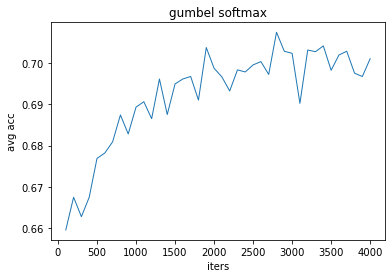

In [44]:
x = np.arange(100, len(acc_list) * 100 + 1, 100)
plt.plot(x, acc_list, linewidth=1)
plt.title("argmax (fix cluster encoder)")
plt.xlabel("iters")
plt.ylabel("avg acc")
plt.show()